HOW TO DECIDE WHICH ML MODEL TO USE

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [34]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [46]:
df.drop(columns=['deck','embark_town','who'],inplace=True)

In [47]:
#Handle missing values
# Fill age with median
df['age'].fillna(df['age'].median(), inplace=True)

# Fill embarked with mode 
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Drop any remaining missing rows
df.dropna(inplace=True)

<AxesSubplot:>

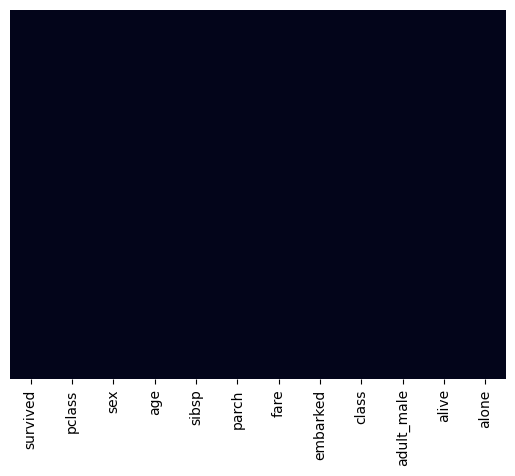

In [37]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   adult_male  891 non-null    bool    
 10  alive       891 non-null    object  
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB


In [50]:
#convert into numerical values
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df['class'] = df['class'].map({'First':1,'Second':2,'Third':3})
df['alone'] = df['alone'].replace({'False': 0, 'True': 1})
df['alive'] = df['alive'].map({'no': 0, 'yes': 1})

In [ ]:
df = df.drop('adult_male',axis=1)

In [ ]:
df['alone'] = df['alone'].astype(int)

In [54]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alive,alone
0,0,3,0,22.0,1,0,7.2500,0,3,0,0
1,1,1,1,38.0,1,0,71.2833,1,1,1,0
2,1,3,1,26.0,0,0,7.9250,0,3,1,1
3,1,1,1,35.0,1,0,53.1000,0,1,1,0
4,0,3,0,35.0,0,0,8.0500,0,3,0,1


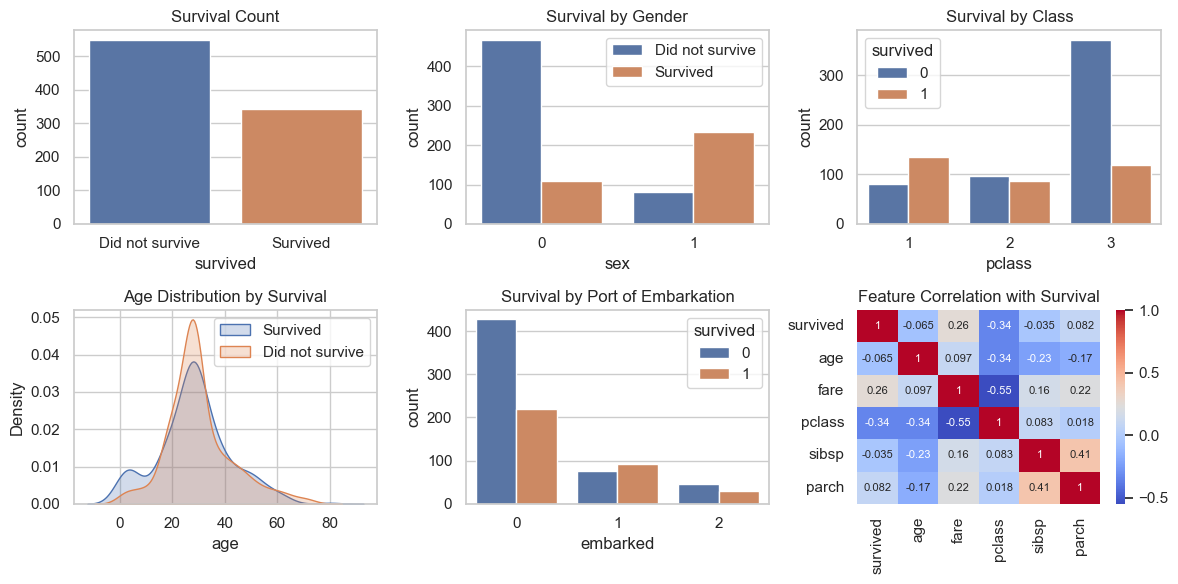

In [59]:
# Set styling
plt.figure(figsize=(12, 6))

# 1. Survival count
plt.subplot(2, 3, 1)
sns.countplot(x="survived", data=df)
plt.title("Survival Count")
plt.xticks([0, 1], ["Did not survive", "Survived"])

# 2. Survival by Gender
plt.subplot(2, 3, 2)
sns.countplot(x="sex", hue="survived", data=df)
plt.title("Survival by Gender")
plt.legend(["Did not survive", "Survived"])

# 3. Survival by Class
plt.subplot(2, 3, 3)
sns.countplot(x="pclass", hue="survived", data=df)
plt.title("Survival by Class")

# 4. Age Distribution by Survival 
plt.subplot(2, 3, 4)
sns.kdeplot(df[df.survived == 1]["age"].dropna(), label="Survived", fill=True)
sns.kdeplot(df[df.survived == 0]["age"].dropna(), label="Did not survive", fill=True)
plt.title("Age Distribution by Survival")
plt.legend()

# 5. Survival by Embarked Port
plt.subplot(2, 3, 5)
sns.countplot(x="embarked", hue="survived", data=df)
plt.title("Survival by Port of Embarkation")

# 6. Heatmap of correlation with survival
# 6. Heatmap of correlation with survival (with smaller font size)
plt.subplot(2, 3, 6)
df_corr = df[["survived", "age", "fare", "pclass", "sibsp", "parch"]].corr()
sns.heatmap(df_corr, annot=True, cmap="coolwarm", annot_kws={"size": 8})  # Adjust font size here
plt.title("Feature Correlation with Survival")

plt.tight_layout()
plt.show()

In [64]:
df = df.drop('alive',axis=1)

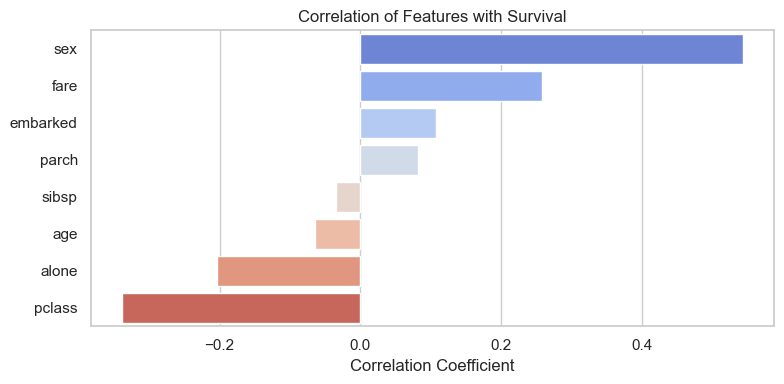

In [65]:
age_corr = df.corr(numeric_only=True)["survived"].drop('survived').sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x=age_corr.values, y=age_corr.index, palette="coolwarm")
plt.title("Correlation of Features with Survival")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()

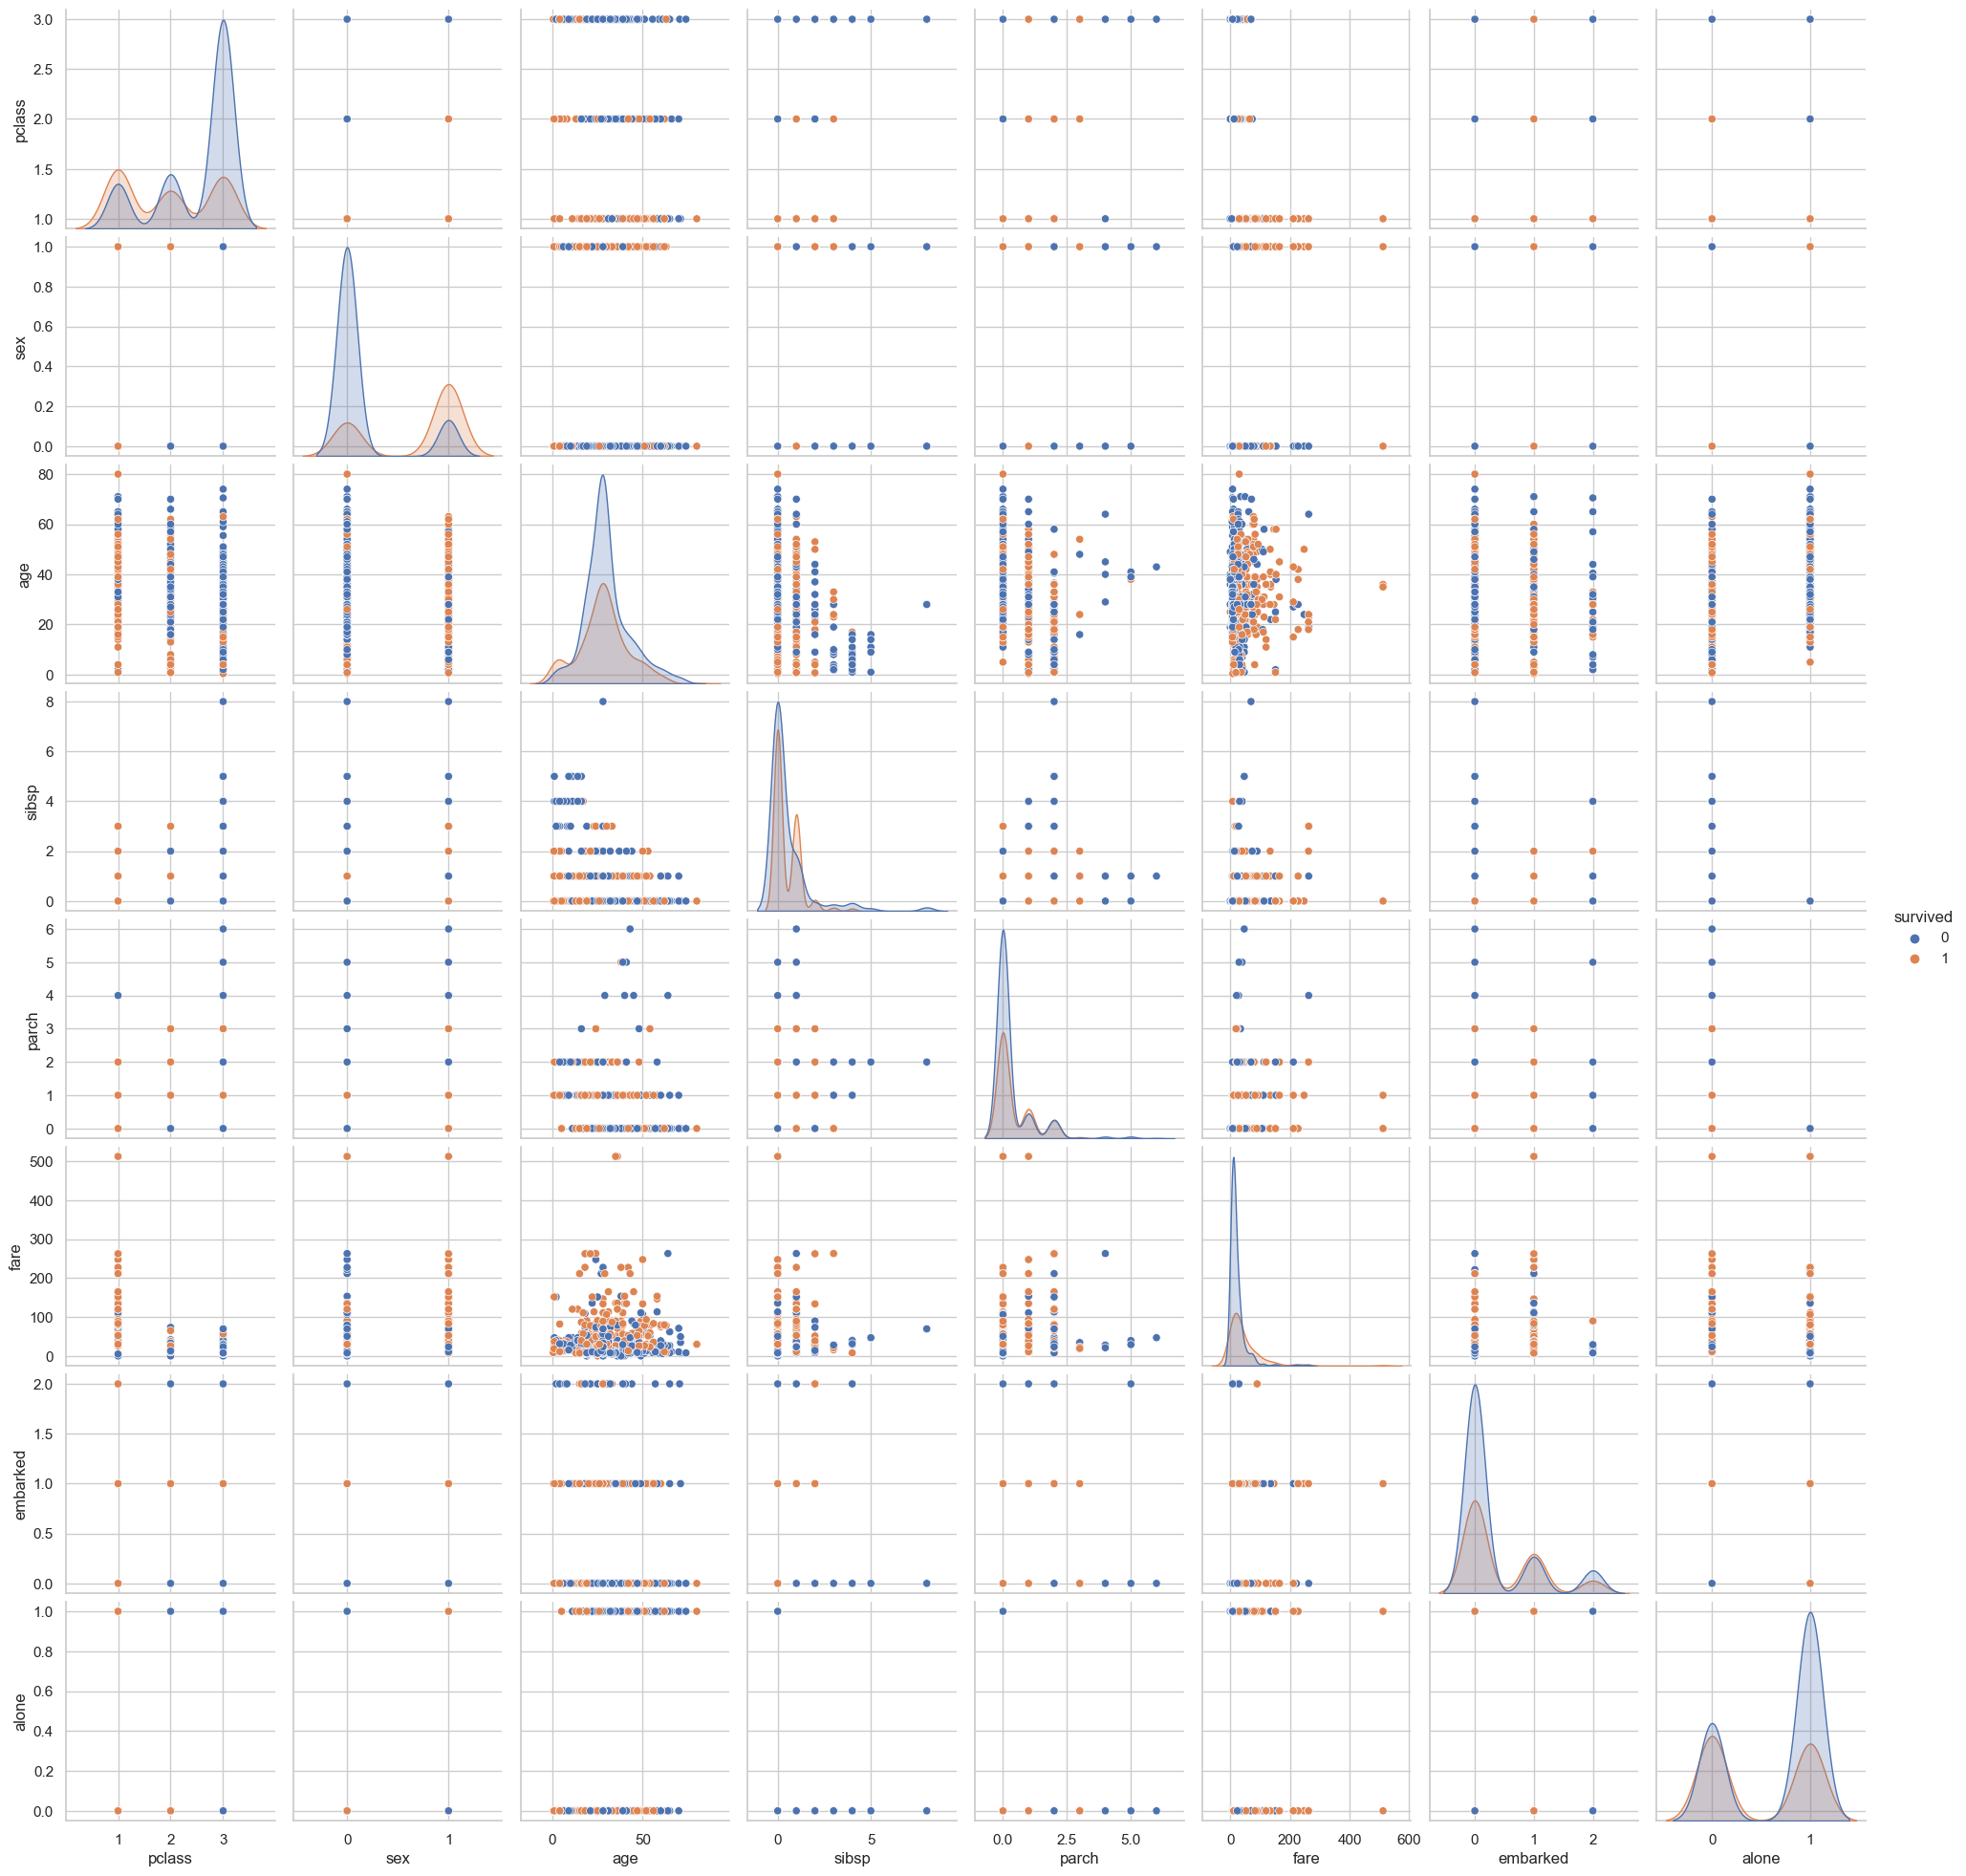

In [67]:
sns.pairplot(df,hue='survived')

In [68]:
#split the dataset
from sklearn.model_selection import train_test_split

X = df.drop("survived", axis=1)
y = df["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
#train and compare
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.7989
Decision Tree Accuracy: 0.7933
Random Forest Accuracy: 0.8212
Gradient Boosting Accuracy: 0.8045


In [70]:
#trying gridsearch cv
feature_importances = pd.Series(
    model.feature_importances_, index=X.columns
).sort_values(ascending=False)

print(feature_importances)

sex         0.469666
fare        0.166543
age         0.129089
pclass      0.128467
sibsp       0.051521
class       0.027044
embarked    0.017051
parch       0.006391
alone       0.004228
dtype: float64


In [71]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)
print("Average CV Accuracy:", scores.mean())


Average CV Accuracy: 0.8103446111355218
